# Import Required Libraries

In [1]:
# Data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load California Housing Dataset

In [2]:
# Load dataset from sklearn
data = fetch_california_housing(as_frame=True)

# Combine features and target into one DataFrame
df = pd.concat([data.data, data.target.rename("MedHouseVal")], axis=1)

# Display first 5 rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Understand Dataset Structure

In [3]:
# Check number of rows and columns
df.shape

# Check data types and null values
df.info()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Check Missing Values

In [4]:
# Count missing values in each column
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# Correlation Heatmap

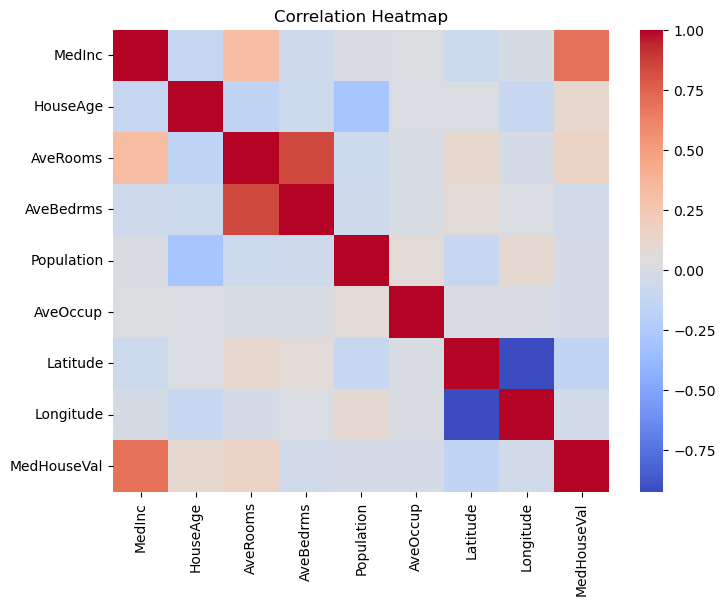

In [6]:
# Visualize correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Split Features and Target

In [7]:
# X contains input features
X = df.drop(columns="MedHouseVal")

# y contains output variable (house price)
y = df["MedHouseVal"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Train Test Split

In [10]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and Train Model

In [11]:
# Create Linear Regression model
model = LinearRegression()

# Train model using training data
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions

In [12]:
# Predict house prices for test data
y_pred = model.predict(X_test)

# Evaluate Model Performance

In [13]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R2   : {r2:.3f}")

MAE  : 0.533
RMSE : 0.746
R2   : 0.576


# Actual vs Predicted Plot

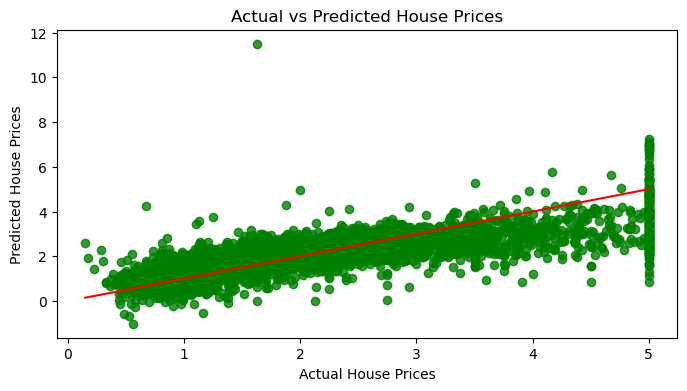

In [20]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.8, color = "Green")

# Axis labels
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")

# Title
plt.title("Actual vs Predicted House Prices")

# Perfect prediction reference line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")

plt.show()

# Residual Plot

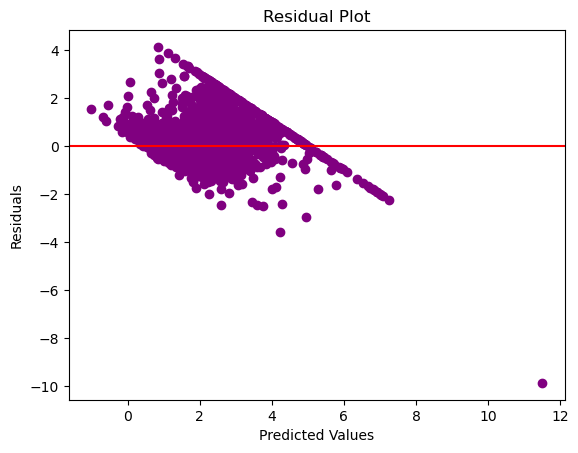

In [22]:
# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, color = 'Purple')
plt.axhline(y=0, color="red")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.show()

# Save Model

In [23]:
# Save trained model to file
import pickle
pickle.dump(model, open("linear_model.pkl", "wb"))